In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("laptop_data.csv")

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [5]:
df.drop("Unnamed: 0", axis = 1 , inplace= True)

In [6]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Inches,1303.0,15.017191,1.426304,10.10,14.00,15.60,15.6000,18.40
Price,1303.0,59870.042910,37243.201786,9270.72,31914.72,52054.56,79274.2464,324954.72


In [8]:
df.shape

(1303, 11)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

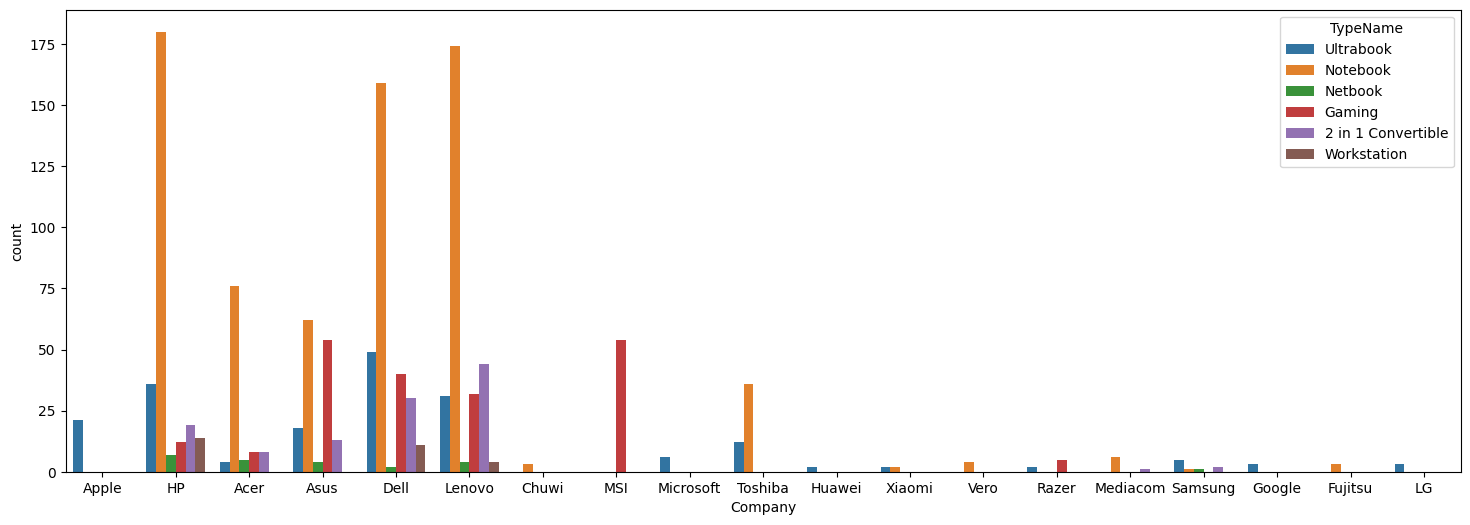

In [11]:
plt.figure(figsize=(18,6))
sns.countplot(data=df, x="Company", hue="TypeName")
plt.show()

In [12]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [13]:
df["Ram"]= df["Ram"].str.replace("GB","").astype("int64")
df["Weight"]= df["Weight"].str.replace("kg","").astype("float64")

In [14]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 119.4+ KB


<Axes: xlabel='Price', ylabel='Density'>

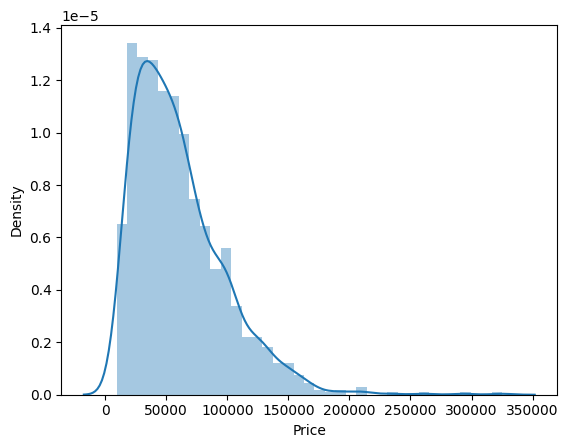

In [16]:
sns.distplot(df["Price"])

In [17]:
df["Company"].value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [18]:
df["Company"].value_counts().sort_values(ascending=True)

Company
Huawei         2
Fujitsu        3
Google         3
Chuwi          3
LG             3
Xiaomi         4
Vero           4
Microsoft      6
Razer          7
Mediacom       7
Samsung        9
Apple         21
Toshiba       48
MSI           54
Acer         101
Asus         151
HP           268
Lenovo       289
Dell         291
Name: count, dtype: int64

<Axes: xlabel='Company'>

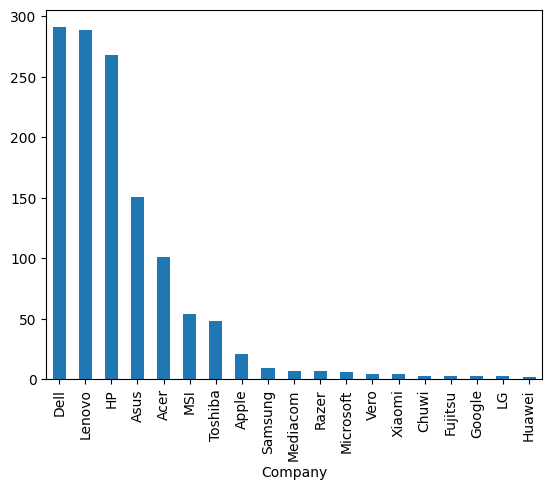

In [19]:
df["Company"].value_counts().sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='Company', ylabel='Price'>

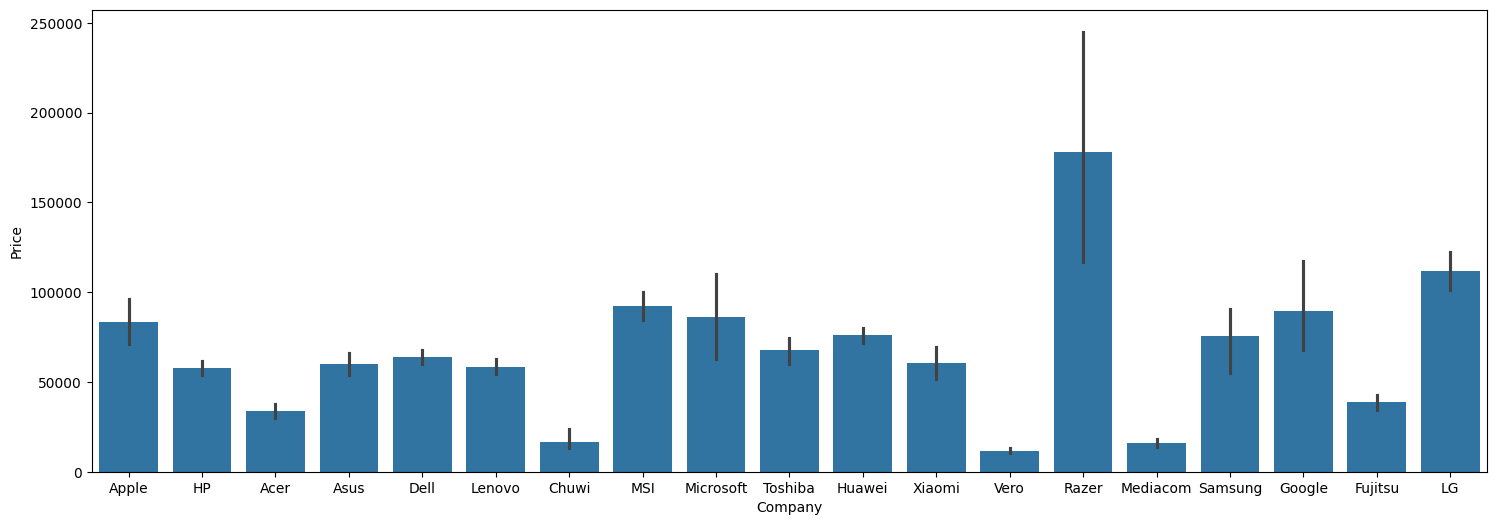

In [20]:
plt.figure(figsize=(18,6))
sns.barplot(x=df["Company"], y=df["Price"])

<Axes: xlabel='TypeName'>

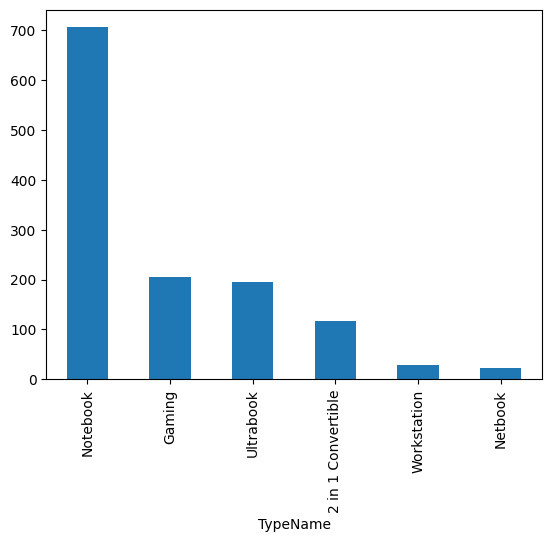

In [21]:
df["TypeName"].value_counts().sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='TypeName', ylabel='Price'>

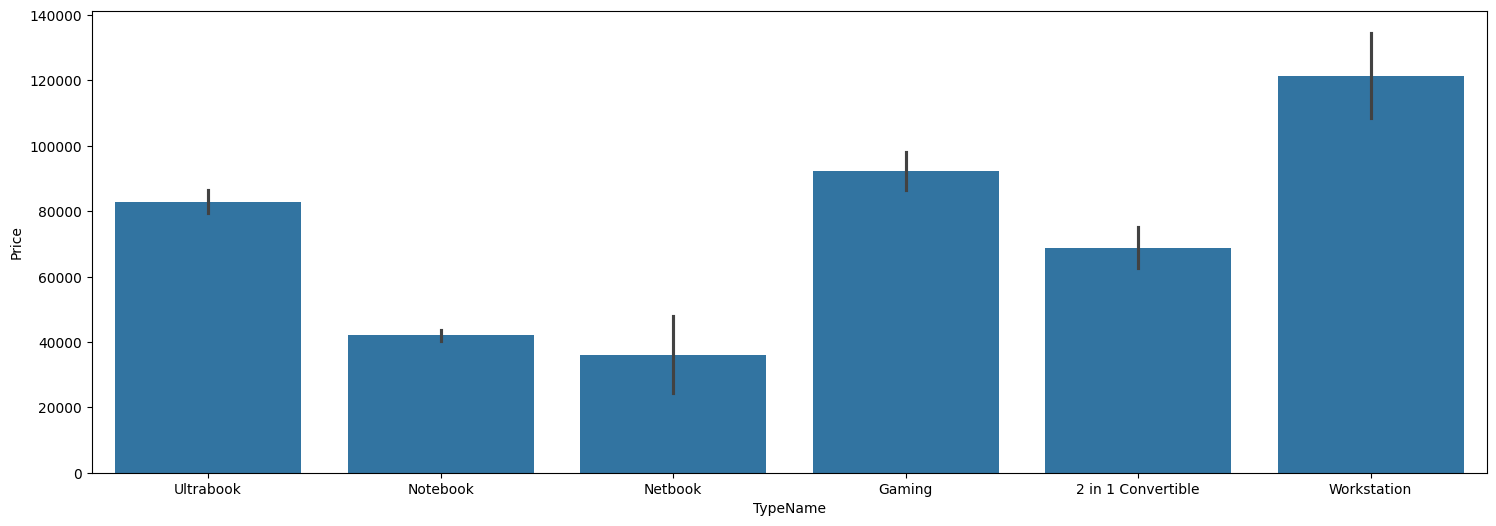

In [22]:
plt.figure(figsize=(18,6))
sns.barplot(x=df["TypeName"], y=df["Price"])

In [23]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


In [24]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
1440x900                     

In [25]:
df["Touchscreen"]= df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

So what have  we done here is that used lambda function to findout if the laptop is TOUCHSCREEN or NOT. AND if the laptop is touchscreen we have given 1 else 0

In [26]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0


In [27]:
df['Touchscreen'].value_counts()

Touchscreen
0    1086
1     188
Name: count, dtype: int64

<Axes: xlabel='Touchscreen', ylabel='Price'>

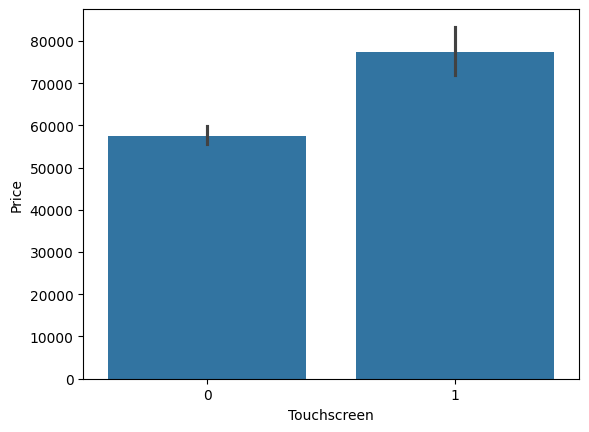

In [28]:
sns.barplot(x=df['Touchscreen'], y=df['Price'])

Finding the average price of the TOUCHSCREEN VS NON TOUCHSCREEN LAPTOP. Its showing that the  laptop with touchscreen has high avreage price but in reality the data is skwed beacause of the  Touchscreen
0   HAS   1086
1   HAS   188

In [29]:
df["IPS"] = df["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0 )

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [31]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [32]:
# df["ScreenResolution"].str.split("x", expand = True)

Expand = TRUE expands it two two different columns

In [33]:
temp = df["ScreenResolution"].str.split("x", expand = True)

In [34]:
df["x_res"] = temp[0]
df['y_res'] = temp[1]

In [35]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [36]:
df["x_res"].str.replace(",","").str.findall(r'(\d+\.?\d+)')

0       [2560]
1       [1440]
2       [1920]
3       [2880]
4       [2560]
         ...  
1269    [1366]
1270    [1920]
1271    [3200]
1272    [1366]
1273    [1366]
Name: x_res, Length: 1274, dtype: object

So as you can see the values are in the list and now we should make it to the normal. So for that we are going to use lambda expression

In [37]:
df["x_res"]=df["x_res"].str.replace(",","").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [38]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [39]:
df["x_res"]= df["x_res"].astype("int64")
df["y_res"]= df["y_res"].astype("int64")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
 11  Touchscreen       1274 non-null   int64  
 12  IPS               1274 non-null   int64  
 13  x_res             1274 non-null   int64  
 14  y_res             1274 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 159.2+ KB


In [41]:
df.corr(numeric_only = True)["Price"]

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
Touchscreen    0.188631
IPS            0.250358
x_res          0.552074
y_res          0.548111
Name: Price, dtype: float64

<Axes: xlabel='Ram', ylabel='Price'>

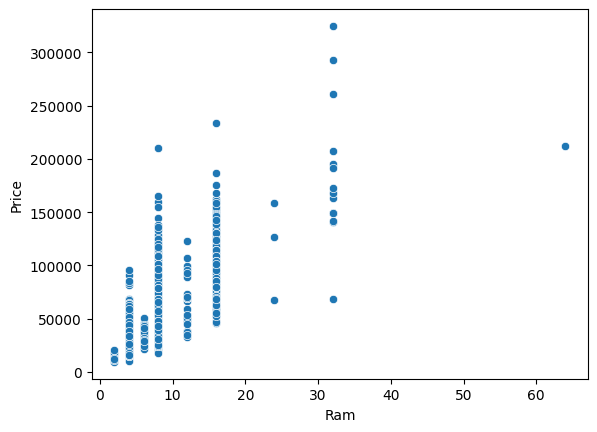

In [42]:
sns.scatterplot(data = df,x="Ram", y="Price")

NOW calculating the  Pixels Per Inch

In [43]:
# Manually we can calculate the ppi by like this but i have decided to make a function that calculates the ppi
# ((df["x_res"]**2) + (df["y_res"]**2)) **0.5/df["Inches"] 

In [44]:
def ppi(row):
    # Extract resolution width (x), height (y), and screen size in inches from the row
    x= row["x_res"] # Taking the X resolution in pixels
    y= row["y_res"]  # Taking the Y resolution in pixels
    inches = row["Inches"] # Diagonal screen size in inches
    # PPI = sqrt(x^2 + y^2) / diagonal size in inches
    return np.sqrt(x**2 + y**2) / inches

In [45]:
df['ppi'] = df.apply(ppi, axis=1)

In [46]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
 11  Touchscreen       1274 non-null   int64  
 12  IPS               1274 non-null   int64  
 13  x_res             1274 non-null   int64  
 14  y_res             1274 non-null   int64  
 15  ppi               1274 non-null   float64
dtypes: float64(4), int64(5), object(7)
memory usage

Now that we have got the pixel per index (PPI). we are  now going to drop the Inches, Screen resolution,x_res,y_res column because its going to affect our model because of high correlation.

In [48]:
df.corr(numeric_only = True)["Price"]

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
Touchscreen    0.188631
IPS            0.250358
x_res          0.552074
y_res          0.548111
ppi            0.469539
Name: Price, dtype: float64

In [49]:
df.drop(columns=["ScreenResolution","x_res","y_res","Inches"], inplace = True )

In [50]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [51]:
df["Cpu Name"]= df["Cpu"].apply(lambda x: " ".join(x.split()[0:3]))

In [52]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [53]:
df["Cpu Name"].value_counts().head(8)

Cpu Name
Intel Core i7         515
Intel Core i5         423
Intel Core i3         134
Intel Celeron Dual     69
Intel Pentium Quad     27
Intel Core M           17
AMD A9-Series 9420     12
AMD A6-Series 9220      8
Name: count, dtype: int64

In [54]:
def fetch_processor(text):
    if text == "Intel Core i7" or text == "Intel Core i3" or text == "Intel Core i5":
        return text
    else:
        if text.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"


In [55]:
df["Cpu brand"] = df["Cpu Name"].apply(fetch_processor)

<Axes: xlabel='Cpu brand'>

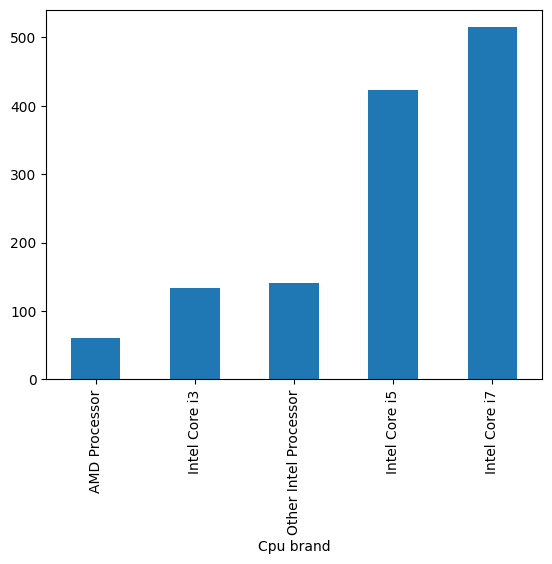

In [56]:
df["Cpu brand"].value_counts().sort_values().plot(kind = "bar")

<Axes: xlabel='Cpu brand', ylabel='Price'>

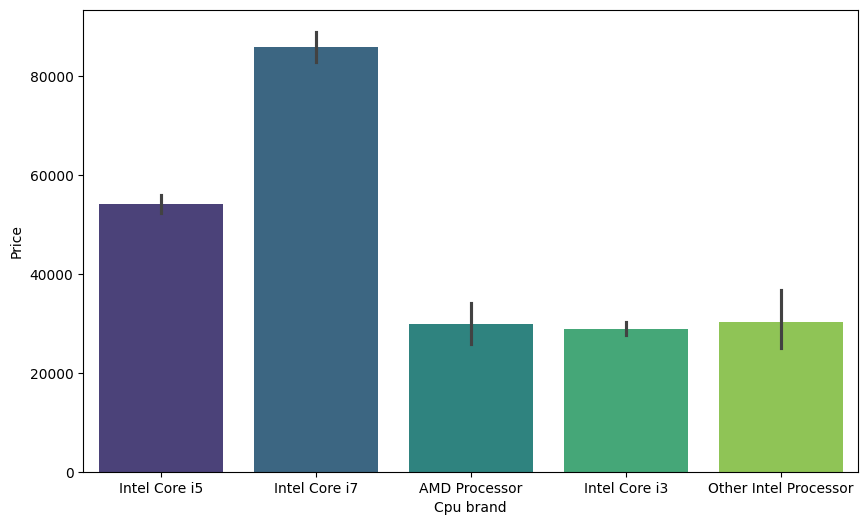

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Cpu brand'], y=df['Price'],palette="viridis")

In [58]:
df.drop(columns=["Cpu","Cpu Name"], inplace = True)

In [59]:
df.head(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5
5,Acer,Notebook,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,100.454670,AMD Processor
6,Apple,Ultrabook,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,Intel Core i7
7,Apple,Ultrabook,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,127.677940,Intel Core i5
8,Asus,Ultrabook,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,157.350512,Intel Core i7
9,Acer,Ultrabook,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,157.350512,Intel Core i5


In [60]:
# df["Memory"] = df["Memory"].astype("str").replace(r"\.0", "", regex=True)
# df["Memory"]= df["Memory"].str.replace("GB","")
# df["Memory"]= df["Memory"].str.replace("TB","000")
# # new = df["Memory"].str.split("+", n=1, expand = True)

In [61]:
# new.head()

In [62]:
# df["first"] = new[0]
# df["first"] = df["first"].str.strip()

In [63]:
# df["second"] = new[1]

In [64]:
# df["Layer1HDD"] = df["first"].apply(lambda x:1 if "HDD" in x else 0)
# df["Layer1SSD"] = df["first"].apply(lambda x:1 if "SSD" in x else 0)
# df["Layer1Hybrid"] = df["first"].apply(lambda x:1 if "Hybrid" in x else 0)
# df["Layer1Flash_Storage"] = df["first"].apply(lambda x:1 if "Flash Storage" in x else 0)

In [65]:
# df["first"] = df["first"].str.replace(r'\D',"")

In [66]:
# df["second"].fillna("0", inplace = True)

In [67]:
# df["Layer2HDD"] = df["second"].apply(lambda x:1 if "HDD" in x else 0)
# df["Layer2SSD"] = df["second"].apply(lambda x:1 if "SSD" in x else 0)
# df["Layer2Hybrid"] = df["second"].apply(lambda x:1 if "Hybrid" in x else 0)
# df["Layer2Flash_Storage"] = df["second"].apply(lambda x:1 if "Flash Storage" in x else 0)

In [68]:
# df["second"]= df["second"].str.replace(r'\D', "")

In [69]:
# df["first"] = df["first"].astype(int)
# df["second"] = df["second"].astype(int)

In [70]:
# Step 1: Ensure Memory column is string and remove any '.0'
df["Memory"] = df["Memory"].astype("str").replace(r"\.0", "", regex=True)

# Step 2: Remove 'GB' and convert 'TB' to '000' (so 1TB = 1000GB)
df["Memory"] = df["Memory"].str.replace("GB", "", regex=False)
df["Memory"] = df["Memory"].str.replace("TB", "000", regex=False)

# Step 3: Split Memory into two parts if it contains '+'
# E.g., '128 SSD + 1TB HDD' becomes ['128 SSD', '1000 HDD']
new = df["Memory"].str.split("+", n=1, expand=True)

# Step 4: Assign split parts to 'first' and 'second' memory layers
df["first"] = new[0].str.strip()
df["second"] = new[1].str.strip() if new.shape[1] > 1 else None

# Step 5: Create binary flags for different storage types in first layer
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Step 6: Remove non-digit characters from 'first' (keep only the size)
df["first"] = df["first"].astype(str).str.replace(r"\D", "", regex=True)

# Step 7: Fill missing values in 'second' with "0" for consistency
df["second"] = df["second"].fillna("0")

# Step 8: Create binary flags for different storage types in second layer
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Step 9: Remove non-digit characters from 'second' (to get numeric size)
df["second"] = df["second"].astype(str).str.replace(r"\D", "", regex=True)

In [71]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [72]:
df["HDD"] = (df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"] = (df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"] = (df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [73]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,1,0,0,0,0,0,0,0,128


In [74]:
df.drop(columns=["first","second","Layer1SSD","Layer2SSD","Layer1HDD","Layer2HDD","Layer1Hybrid","Layer2Hybrid","Layer1Flash_Storage","Layer2Flash_Storage"], inplace = True)

In [75]:
df.drop(columns=["Memory"], inplace = True)

In [76]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [77]:
df.corr(numeric_only = True)["Price"]

Ram              0.740106
Weight           0.212192
Price            1.000000
Touchscreen      0.188631
IPS              0.250358
ppi              0.469539
HDD             -0.098011
SSD              0.669957
Hybrid           0.022533
Flash_Storage   -0.037176
Name: Price, dtype: float64

In [78]:
df.drop(columns=["Hybrid","Flash_Storage"], inplace = True)

In [79]:
df["Gpu brand"]= df["Gpu"].apply(lambda x:x.split()[0])

In [80]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [81]:
df.drop(columns = ["Gpu"], inplace = True)

In [82]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [83]:
df["Gpu brand"].value_counts()

Gpu brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [84]:
df[df["Gpu brand"]== "ARM"]

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
1191,Samsung,2 in 1 Convertible,4,Chrome OS,1.15,35111.52,1,1,234.5074,AMD Processor,0,0,ARM


In [85]:
df = df[df["Gpu brand"]!= "ARM"]

So we are storing everything that is not equal to ARM in this expression

In [86]:
df["Gpu brand"].value_counts()

Gpu brand
Intel     703
Nvidia    396
AMD       174
Name: count, dtype: int64

<Axes: xlabel='Gpu brand', ylabel='Price'>

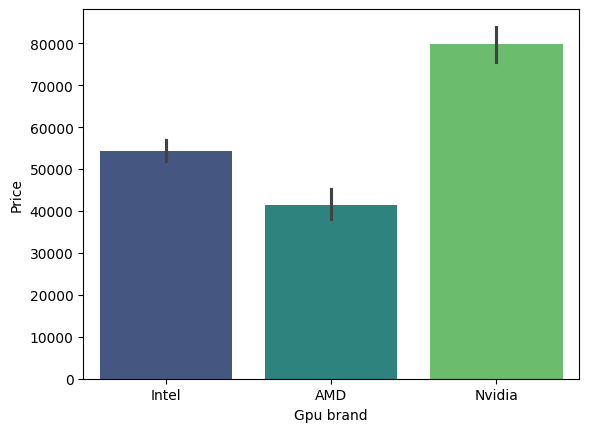

In [87]:
sns.barplot(x=df['Gpu brand'], y=df['Price'], palette="viridis")

In [88]:
df["OpSys"].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

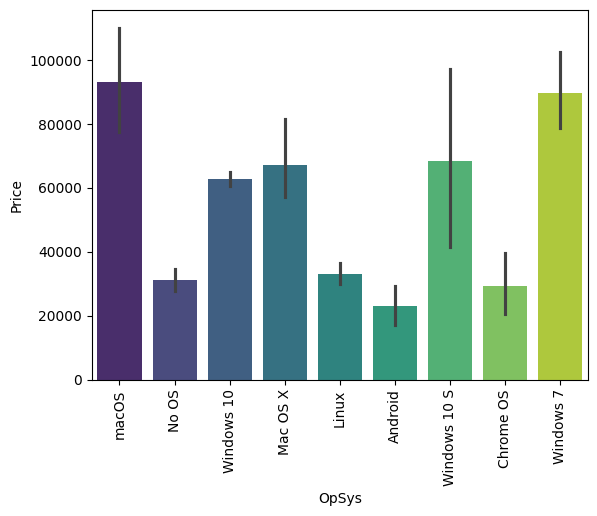

In [89]:
sns.barplot(x=df['OpSys'], y=df['Price'], palette="viridis")
plt.xticks(rotation="vertical")
plt.show()

In [90]:
def os(inp):
    if inp=="Windows 10" or inp=="windows 7" or inp== "Windows 10 S":
        return "Windows"
    elif inp== "macOS" or inp=="Mac OS X":
        return "Mac"
    else: 
        return "Other/No OS/Linux"

In [91]:
df["os"] = df["OpSys"].apply(os)

In [92]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [93]:
df.drop(columns=["OpSys"], inplace = True)

In [94]:
df.head(3)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other/No OS/Linux


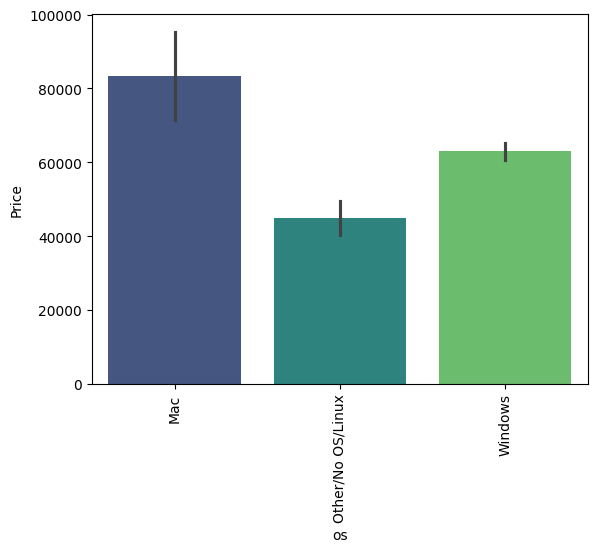

In [95]:
sns.barplot(x=df['os'], y=df['Price'], palette="viridis")
plt.xticks(rotation="vertical")
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

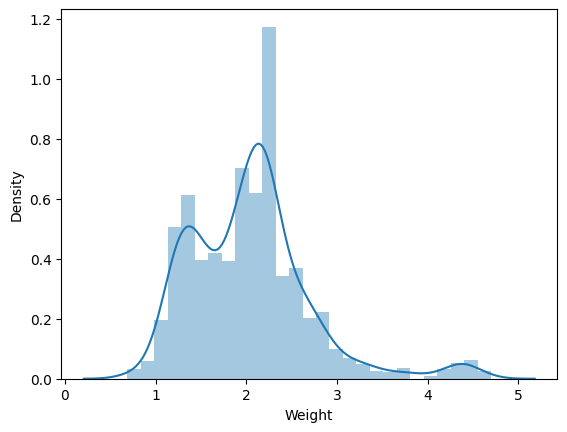

In [96]:
sns.distplot(df["Weight"])

<Axes: xlabel='Weight', ylabel='Price'>

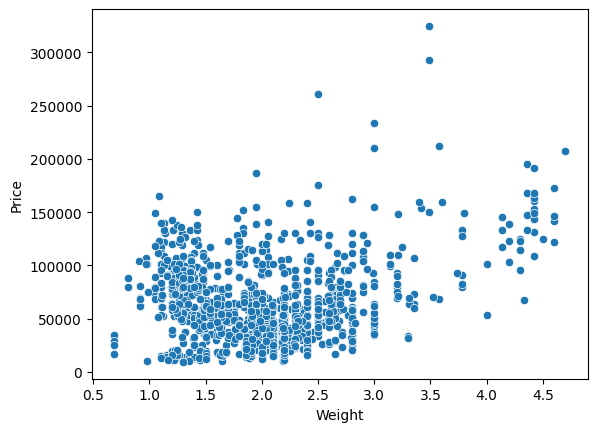

In [97]:
sns.scatterplot(x=df["Weight"], y=df["Price"])

<Axes: >

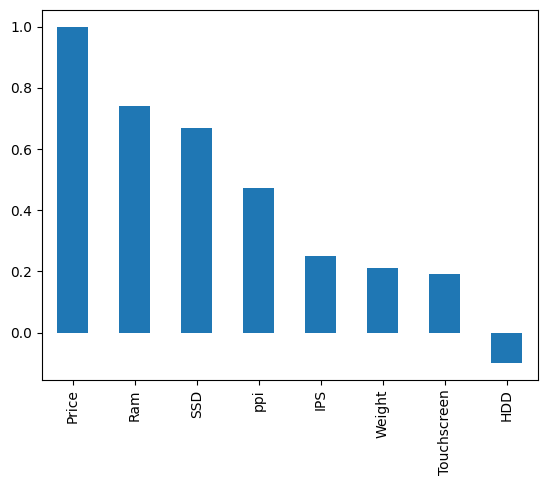

In [98]:
df.corr(numeric_only = True)["Price"].sort_values(ascending=False).plot(kind="bar")

<Axes: >

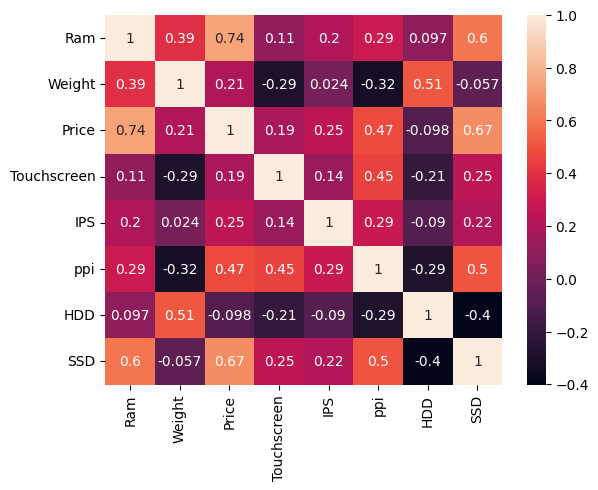

In [99]:
sns.heatmap(df.corr(numeric_only =  True), annot = True) 

In [100]:
X= df.drop(columns=["Price"])
y=np.log(df["Price"])

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [103]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [104]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR

In [133]:
X_test["SSD"]= X_test["SSD"].astype("int")

In [134]:
print(X_train['Touchscreen'].unique())
print(X_test['Touchscreen'].unique())

[0 1]
[0 1]


In [135]:
for col in X_test.columns:
    if 64 in X_test[col].unique():
        print(f"⚠️ Column '{col}' has value 64")

⚠️ Column 'SSD' has value 64


### Linear Regression

In [144]:
step1= ColumnTransformer(
    transformers=[('col_tnf',OneHotEncoder(sparse_output=False, drop='first',handle_unknown='ignore'),[0,1,7,8,9,10,11])
                ], remainder='passthrough')

step2=LinearRegression()



In [145]:
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

In [146]:
pipe.fit(X_train,y_train)

,steps,"[('step1', ...), ('step2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('col_tnf', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [147]:
y_pred  = pipe.predict(X_test)

In [148]:
from sklearn.metrics import r2_score,mean_absolute_error

In [149]:
print(r2_score(y_test,y_pred))

0.784353675909975


In [150]:
print(mean_absolute_error(y_test,y_pred))

0.21938678242985774


### Decision Tree

In [171]:
step1= ColumnTransformer(
    transformers=[('col_tnf',OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),[0,1,7,8,9,10,11])
                ], remainder='passthrough')

step2= DecisionTreeRegressor(max_depth=8)

In [172]:
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

In [173]:
pipe.fit(X_train,y_train)

,steps,"[('step1', ...), ('step2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('col_tnf', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [174]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.784353675909975
0.21938678242985774
